## Build the Image classification model 

In [10]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization, Dropout
import random

In this code block, several libraries and modules are imported. Let me explain each import statement and its purpose:

1. **`import matplotlib.pyplot as plt`**:
   - This line imports the `matplotlib` library, specifically the `pyplot` module, which is used for creating visualizations and plots. It is commonly used for displaying images, graphs, and charts.

2. **`import tensorflow as tf`**:
   - This imports the TensorFlow library, an open-source machine learning framework developed by the Google Brain team. TensorFlow provides tools for building and training machine learning models.

3. **`from tensorflow.keras import datasets, layers, models`**:
   - This imports specific modules (`datasets`, `layers`, and `models`) from the `tensorflow.keras` package. Keras is a high-level neural networks API, and it's integrated into TensorFlow. These modules are essential for defining and training neural network models.

4. **`import numpy as np`**:
   - This imports the NumPy library, which provides support for large, multi-dimensional arrays and matrices, along with a variety of mathematical functions. NumPy is widely used for numerical computations in Python.

5. **`from tensorflow.keras.utils import to_categorical`**:
   - This imports the `to_categorical` function from TensorFlow's Keras utilities. `to_categorical` is used for one-hot encoding, a technique often applied to categorical variables in machine learning tasks.

6. **`import random`**:
   - This imports the `random` module from the Python standard library. `random` provides functions for generating pseudo-random numbers and performing random selections.

These imports provide the necessary tools and functions for building an image classification model, including visualization, data handling, and model construction. Subsequent code blocks will likely use these imported libraries to implement different stages of the image classification process.

## a. Loading and preprocessing the image data

In [11]:
data = np.load('cifar-10.npz')
filenames = ["x_train","y_train","x_test","y_test"]
nps = []
for filename in filenames:
    nps.append(data[filename])
train_images,train_labels,test_images,test_labels = nps

In this code block, a dataset in NumPy format (saved as 'cifar-10.npz') is loaded, and the necessary data arrays (`train_images`, `train_labels`, `test_images`, `test_labels`) are extracted from the loaded file. Let me explain the code step by step:

1. **`data = np.load('cifar-10.npz')`**:
   - This line loads a NumPy data file named 'cifar-10.npz'. The loaded data contains several arrays representing different parts of the CIFAR-10 dataset, a popular dataset for image classification.

2. **`filenames = ["x_train","y_train","x_test","y_test"]`**:
   - This line defines a list of strings representing the names of arrays in the loaded dataset file. These names correspond to different parts of the CIFAR-10 dataset: training images, training labels, test images, and test labels.

3. **`nps = []`**:
   - This line initializes an empty list `nps` where the extracted arrays will be stored.

4. **`for filename in filenames:`**:
   - This line starts a loop over the `filenames` list, iterating through the array names.

5. **`nps.append(data[filename])`**:
   - Inside the loop, for each filename, the corresponding array is extracted from the loaded data (`data[filename]`) and appended to the `nps` list.

6. **`train_images, train_labels, test_images, test_labels = nps`**:
   - After the loop, the elements of the `nps` list are unpacked into separate variables: `train_images`, `train_labels`, `test_images`, and `test_labels`. These variables now hold the training and testing data necessary for building and training an image classification model.

In summary, this code block loads the CIFAR-10 dataset from a NumPy file and extracts the training and testing images along with their corresponding labels, preparing the data for further processing and model training.

#### Shuffling, resizing images

In [12]:
train_images, test_images = train_images / 255.0, test_images / 255.0
y_train_cat = to_categorical(train_labels, 10)
y_test_cat  = to_categorical(test_labels, 10)

In this code block, the training and test images are normalized and the labels are one-hot encoded, preparing the data for training an image classification model. Let me explain each line of code:

1. **Normalization of Images:**
   ```python
   train_images, test_images = train_images / 255.0, test_images / 255.0
   ```
   - In this line, the pixel values of the training and test images are divided by 255.0. This operation scales the pixel values from the range of 0 to 255 to the range of 0 to 1. Normalizing the pixel values is a common practice in deep learning to ensure that the input features are within a similar scale, which can improve the convergence and performance of the model during training.

2. **One-Hot Encoding of Labels:**
   ```python
   y_train_cat = to_categorical(train_labels, 10)
   y_test_cat = to_categorical(test_labels, 10)
   ```
   - These lines use the `to_categorical` function from Keras utilities to perform one-hot encoding on the training and test labels (`train_labels` and `test_labels`). One-hot encoding is a technique used to convert categorical labels into a binary matrix format. In this case, the labels represent categories from 0 to 9 (10 classes), so `to_categorical` converts these numerical labels into binary matrices where each row corresponds to a sample and each column corresponds to a class. The column corresponding to the true class for each sample is set to 1, and all other columns are set to 0.

After these operations, `train_images` and `test_images` are normalized to the range [0, 1], and `y_train_cat` and `y_test_cat` are one-hot encoded representations of the original training and test labels, respectively. These processed data will be used for training and evaluating the image classification model.

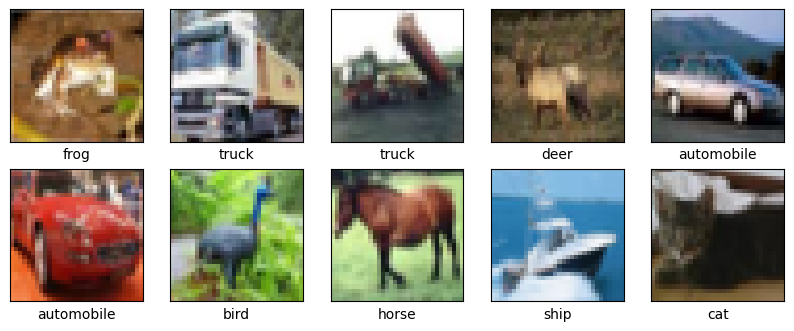

In [13]:
# define class_names and plot some of the images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## b. Defining the model’s architecture

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In this code block, a convolutional neural network (CNN) model is defined using the Keras Sequential API. Let's break down the code and explain each layer:

1. **`model = models.Sequential()`**:
   - This line creates a sequential model, which allows you to add layers one by one in a linear stack.

2. **Convolutional Layer 1:**
   ```python
   model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
   ```
   - This line adds a 2D convolutional layer with 32 filters of size (3, 3). The activation function used is ReLU (Rectified Linear Unit). The input shape of the images is (32, 32, 3), representing 32x32 pixels with 3 color channels (RGB).

3. **Batch Normalization Layer 1:**
   ```python
   model.add(BatchNormalization())
   ```
   - Batch normalization normalizes the activations of the previous layer, improving stability and accelerating the training process.

4. **MaxPooling Layer 1:**
   ```python
   model.add(layers.MaxPooling2D((2, 2)))
   ```
   - This line adds a 2x2 max-pooling layer, which reduces the spatial dimensions of the feature maps by taking the maximum value in each 2x2 patch.

5. **Dropout Layer 1:**
   ```python
   model.add(Dropout(0.25))
   ```
   - Dropout is a regularization technique that randomly sets a fraction of input units to 0 at each update during training, preventing overfitting.

6. **Convolutional Layer 2:**
   ```python
   model.add(layers.Conv2D(64, (3, 3), activation='relu'))
   ```
   - This line adds another convolutional layer with 64 filters of size (3, 3) and ReLU activation.

7. **Batch Normalization Layer 2:**
   ```python
   model.add(BatchNormalization())
   ```
   - Another batch normalization layer is added after the second convolutional layer.

8. **MaxPooling Layer 2:**
   ```python
   model.add(layers.MaxPooling2D((2, 2)))
   ```
   - Another max-pooling layer is added after the second convolutional layer.

9. **Dropout Layer 2:**
   ```python
   model.add(Dropout(0.25))
   ```
   - Another dropout layer is added after the second max-pooling layer.

10. **Convolutional Layer 3:**
   ```python
   model.add(layers.Conv2D(64, (3, 3), activation='relu'))
   ```
   - This line adds a third convolutional layer with 64 filters of size (3, 3) and ReLU activation.

11. **Batch Normalization Layer 3:**
   ```python
   model.add(BatchNormalization())
   ```
   - Another batch normalization layer is added after the third convolutional layer.

12. **Flatten Layer:**
   ```python
   model.add(layers.Flatten())
   ```
   - The flatten layer flattens the 2D feature maps into a 1D vector, preparing the data for the fully connected layers.

13. **Dense (Fully Connected) Layer 1:**
   ```python
   model.add(layers.Dense(64, activation='relu'))
   ```
   - This line adds a fully connected layer with 64 neurons and ReLU activation.

14. **Dense (Fully Connected) Layer 2 (Output Layer):**
   ```python
   model.add(layers.Dense(10, activation='softmax'))
   ```
   - This line adds the output layer with 10 neurons (one for each class in CIFAR-10) and softmax activation, which is suitable for multiclass classification.

15. **Summary:**
   ```python
   model.summary()
   ```
   - Finally, the `summary()` method is called to print a summary of the model's architecture, including the number of parameters in each layer and the total trainable parameters.

This model consists of convolutional layers followed by batch normalization, max-pooling, dropout, and fully connected layers, which are common components of a CNN architecture for image classification tasks.

In [15]:
#compile the model 
model.compile(optimizer='adam',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

In this code block, the compiled model is prepared for training. Let me explain the `compile` method and its arguments:

```python
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
```

- **`optimizer='adam'`**:
   - The `optimizer` argument specifies the optimization algorithm to be used during training. `'adam'` refers to the Adam optimizer, which is an adaptive learning rate optimization algorithm that works well for a wide range of problems. Adam automatically adjusts the learning rates of each parameter based on their historical gradients, making it a popular choice in deep learning.

- **`loss='categorical_crossentropy'`**:
   - The `loss` argument defines the loss function to be optimized during training. For multi-class classification tasks like CIFAR-10, `'categorical_crossentropy'` is a suitable choice. Categorical crossentropy measures the dissimilarity between the true class labels (encoded as one-hot vectors) and the predicted class probabilities outputted by the model. The goal during training is to minimize this loss, improving the model's ability to correctly classify images into the appropriate categories.

- **`metrics=['accuracy']`**:
   - The `metrics` argument specifies the evaluation metric(s) to be monitored during training. In this case, `'accuracy'` is chosen, which measures the proportion of correctly classified samples out of the total samples. During training, the model will display the accuracy on the training data, allowing you to track how well the model is performing on the training set.

After compiling the model, it is ready to be trained using the training data (`train_images` and `y_train_cat`). The optimization process will minimize the specified loss function, improving the model's ability to make accurate predictions on unseen data.

## c. Training the model

In [16]:
epochs=15 # set this according to your computer
history=model.fit(train_images, y_train_cat,
                  validation_data=(test_images,y_test_cat),epochs=epochs)

Epoch 1/15
1563/1563 [==============================] - 40s 25ms/step - loss: 1.5233 - accuracy: 0.4468 - val_loss: 1.2960 - val_accuracy: 0.5391
Epoch 2/15
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1570 - accuracy: 0.5929 - val_loss: 1.1171 - val_accuracy: 0.6033
Epoch 3/15
1563/1563 [==============================] - 35s 22ms/step - loss: 1.0039 - accuracy: 0.6452 - val_loss: 0.9595 - val_accuracy: 0.6605
Epoch 4/15
1563/1563 [==============================] - 35s 22ms/step - loss: 0.9043 - accuracy: 0.6838 - val_loss: 0.9330 - val_accuracy: 0.6712
Epoch 5/15
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8287 - accuracy: 0.7095 - val_loss: 0.8798 - val_accuracy: 0.6950
Epoch 6/15
1563/1563 [==============================] - 35s 22ms/step - loss: 0.7682 - accuracy: 0.7302 - val_loss: 0.9050 - val_accuracy: 0.6857
Epoch 7/15
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7198 - accuracy: 0.7462 - val_loss: 0.8577 -

## d. Estimating the model’s performance

In [17]:
test_loss,test_acc = model.evaluate(test_images,y_test_cat)
print("loss %.3f"%test_loss)
print("acc %.3f"%test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.9696 - accuracy: 0.7134
loss 0.970
acc 0.713


In [18]:
# predicting the values of the test images
predicted_values = model.predict(test_images)

313/313 [==============================] - 3s 9ms/step


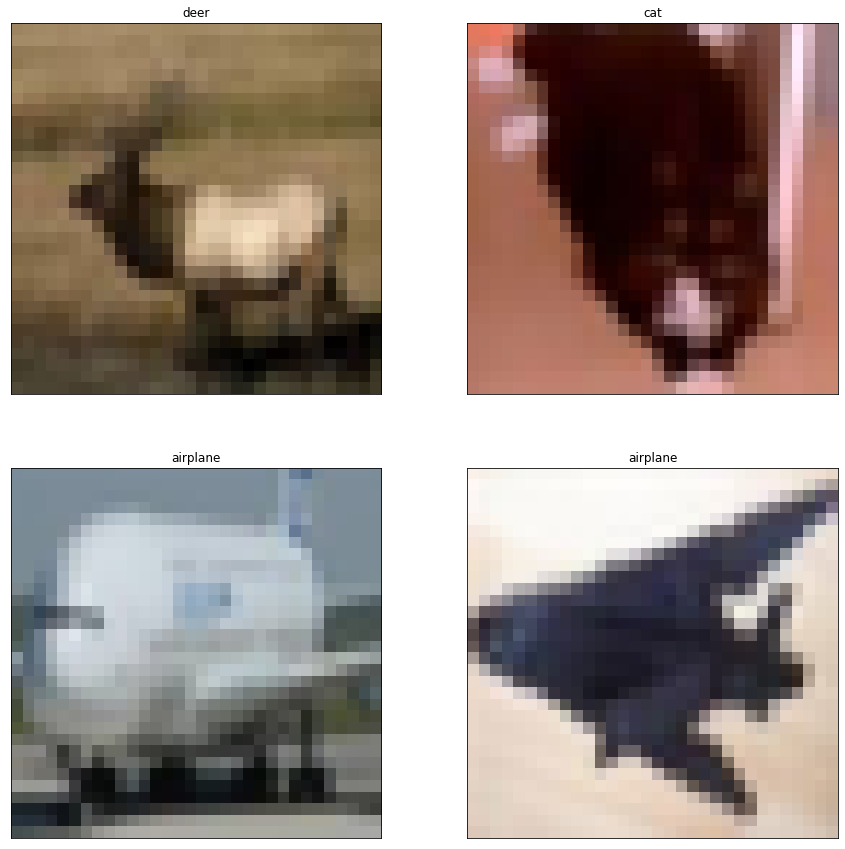

In [16]:
plt.figure(figsize=(15,15))
for i in range(4):
    n = random.randint(0,9999)
    plt.subplot(2,2,i+1)
    plt.imshow(test_images[n])
    plt.yticks([])
    plt.xticks([])
    plt.grid(False)
    plt.title(class_names[np.argmax(predicted_values[n])])
plt.show()

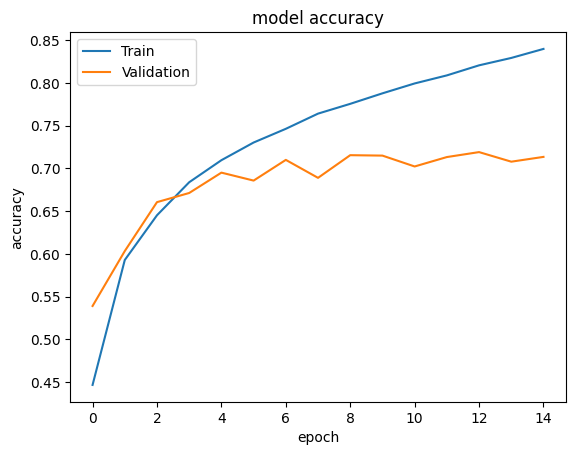

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()